In [280]:
import pandas as pd
import json

In [281]:
def parse_json(filepath, include_types=['TEXT', 'SELECTED_OPTION']):
    try:
        # JSON dosyasını oku
        with open(filepath, "r", encoding="utf-8") as f:
            conversations = json.load(f)

        rows = []
        for convo in conversations:
            for msg in convo["messages"]:
                # Sadece istenen mesaj türlerini işle
                if msg.get("type") not in include_types:
                    continue
                
                # Content alanını al
                content = msg.get("content")
                if isinstance(content, dict):
                    text = content.get("text", "")
                else:
                    text = str(content) if content else ""
                
                # Boş veya sadece boşluk içeren metinleri atla
                if not text or not str(text).strip():
                    continue
                
                # Göndericiyi belirle
                sender_id = msg.get("sender_id")
                sender = "bot" if sender_id and sender_id.startswith("bf") else "user"
                
                # Satır oluştur
                rows.append({
                    "conversation_id": convo["conversation_id"],
                    "timestamp": msg["created_at"],
                    "sender": sender,
                    "text": text.strip(),
                    "message_type": msg.get("type"),  # Mesaj türünü ekle
                    "is_internal": msg.get("is_internal", False)  # Dahili mi?
                })
        
        # DataFrame oluştur
        df = pd.DataFrame(rows)
        
        # Timestamp'ı datetime formatına çevir
        if not df.empty:
            df['timestamp'] = pd.to_datetime(df['timestamp'])
        
        return df
    
    except FileNotFoundError:
        print(f"Hata: {filepath} dosyası bulunamadı.")
        return pd.DataFrame()
    except json.JSONDecodeError:
        print(f"Hata: {filepath} dosyası geçerli bir JSON formatında değil.")
        return pd.DataFrame()
    except Exception as e:
        print(f"Bilinmeyen bir hata oluştu: {str(e)}")
        return pd.DataFrame()

In [282]:
df = parse_json('last-500-conversation-dugunbuketi.json')
df.loc[:, 'message_number'] = df.groupby('conversation_id').cumcount() + 1
df

,conversation_id,timestamp,sender,text,message_type,is_internal,message_number
0,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:33:45,bot,"Merhaba, ben Hera. Size uygun mekanı veya firm...",TEXT,False,1
1,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:33:51,user,Kına,SELECTED_OPTION,False,2
2,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:33:54,bot,"Harika, **kına gecesi** için yardımcı olabilir...",TEXT,False,3
3,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:34:06,user,Diyarbakır’da hem düğün hem kına,TEXT,False,4
4,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:34:16,bot,Çok güzel! **Diyarbakır’da hem düğün hem de kı...,TEXT,False,5
...,...,...,...,...,...,...,...
8208,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:18,bot,"Belirttiğiniz kriterlerle (**Tepebaşı, 800 kiş...",TEXT,False,19
8209,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:49,user,Büçtçe yükseltelim,TEXT,False,20
8210,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:52,bot,"Anladım, bütçenizi yükseltmek istiyorsunuz. Si...",TEXT,False,21
8211,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:56,user,400.000,TEXT,False,22


In [283]:
df = df.sort_values(by=["conversation_id", "timestamp"])
df

,conversation_id,timestamp,sender,text,message_type,is_internal,message_number
0,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:33:45,bot,"Merhaba, ben Hera. Size uygun mekanı veya firm...",TEXT,False,1
1,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:33:51,user,Kına,SELECTED_OPTION,False,2
2,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:33:54,bot,"Harika, **kına gecesi** için yardımcı olabilir...",TEXT,False,3
3,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:34:06,user,Diyarbakır’da hem düğün hem kına,TEXT,False,4
4,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,2025-06-10 19:34:16,bot,Çok güzel! **Diyarbakır’da hem düğün hem de kı...,TEXT,False,5
...,...,...,...,...,...,...,...
8208,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:18,bot,"Belirttiğiniz kriterlerle (**Tepebaşı, 800 kiş...",TEXT,False,19
8209,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:49,user,Büçtçe yükseltelim,TEXT,False,20
8210,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:52,bot,"Anladım, bütçenizi yükseltmek istiyorsunuz. Si...",TEXT,False,21
8211,9f71418d-ab48-4eae-a783-5ac65237e7f6,2025-07-21 08:53:56,user,400.000,TEXT,False,22


In [284]:
df_sonuc=pd.DataFrame(columns=["conversation_id","merged_talk","timestamp"])
df_sonuc

,conversation_id,merged_talk,timestamp


In [285]:
# Aynı conversation_id'ye sahip mesajları birleştir ve konuşma numaralarını oluştur
birlesik_konusmalar = df.groupby("conversation_id").apply(
    lambda x: "\n".join(f"Gönderici: {row['sender']} - Mesaj: {row['text']}" for _, row in x.sort_values("timestamp").iterrows())
).reset_index(name="birlesik_mesaj")

# Konuşma numaralarını oluştur (Konuşma 1, Konuşma 2, ...)
birlesik_konusmalar["konusma"] = [f"Konuşma {i+1}" for i in range(len(birlesik_konusmalar))]

# Yalnızca konusma ve birlesik_mesaj sütunlarını tut
df_sonuc["konusma"] = birlesik_konusmalar["konusma"]
df_sonuc["merged_talk"]=birlesik_konusmalar["birlesik_mesaj"]
df_sonuc["conversation_id"]=birlesik_konusmalar["conversation_id"]
df_sonuc["timestamp"]=df["timestamp"]
df_sonuc

C:\Users\meteh\AppData\Local\Temp\ipykernel_15432\854257651.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  birlesik_konusmalar = df.groupby("conversation_id").apply(


,conversation_id,merged_talk,timestamp,konusma
0,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-10 19:33:45,Konuşma 1
1,9f1fb51c-a029-4691-973d-63772a5f82ab,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-10 19:33:51,Konuşma 2
2,9f1fb55f-544f-4c63-bcf0-4bba9aa984d5,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-10 19:33:54,Konuşma 3
3,9f1fc574-98e7-4e66-b86c-e77c51347f3b,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-10 19:34:06,Konuşma 4
4,9f1fd866-240c-42d0-a3b5-84133bcba6fb,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-10 19:34:16,Konuşma 5
...,...,...,...,...
495,9f704acf-287e-4954-8241-73523bd6af94,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-12 11:05:25,Konuşma 496
496,9f704d3c-2014-4021-a753-13931b67b735,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-12 11:05:33,Konuşma 497
497,9f705686-4e4c-4be3-8a81-4737f9f09c5e,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-12 11:05:36,Konuşma 498
498,9f7140cc-d230-4e1e-bba6-470887d86294,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-12 11:05:49,Konuşma 499


In [112]:
df_sonuc.to_csv("birlesikKonusmalar.csv",index=False,encoding="utf-8")

In [205]:
from openai import OpenAI
import os

In [206]:
from dotenv import load_dotenv


load_dotenv()

api_key = os.getenv("OPENAI_API_KEY")
# OpenAI client oluştur
client = OpenAI(api_key=api_key)


MODEL = "gpt-5-nano"

In [207]:
def prompt_olusturSentiment(mesaj):
    return f"""
Türkçe konuşuyorum. Aşağıda kullanıcının userın bir botla göüşmesinin mesajları  var. Bu mesajları bir düğün analizi uzmanı gibi analiz et. Analiz sonucunu yazmana gerek yok. Kullanıcının konuşma mesajlarındaki genel sentimentini değerlendir ve bir etiket ver: [Pozitif / Negatif / Nötr]

**Sentiment Etiketleme Mantığı**:
- Kullanıcının mesajları tamamen olumlu ve kesin pozitif anlam içeriyorsa: **Pozitif**
- Kullanıcının mesajları genel olarak net bir şekilde negatif durumlar içeriyorsa: **Negatif**
- Kullanıcının mesajları net olarak pozitif veya negatif değilse, yani karışık veya nötr bir tonda ise: **Nötr**
- Her mesajı ayrı ayrı analiz et, ancak etiketi konuşmanın geneline bakarak belirle.

**Cevap Formatı**: Cevap kesinlikle sadece üç seçenekten biri olmalı: "Pozitif" veya "Negatif" veya "Nötr". Başka hiçbir şey yazma.

Bot-User gorusmesi: "{mesaj}"
"""

In [208]:
def promptOlusturKonu(mesaj):
    return f"""
Türkçe konuşuyorum. Aşağıdaki bot ile kullanıcının görüşmesindeki kullanıcı mesajlarını bir düğün analizi uzmanı gibi analiz et. Analiz sonucunu yazmana gerek yok. Kullanıcı mesajlarının içerdiği kategorileri belirle.  

Kategori Etiketleme Mantığı:
- Kullanılacak altı kategori: Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Tarih ve Zaman,Bütçe ve Kapasite,İkram ve Menü
- Her kategori için örnek anahtar kelimeler:

Etkinlik Türü: düğün, düğün salonu, kır düğünü, kına, nişan, sünnet, doğum günü, mezuniyet, parti  
Hizmet Türü: organizasyon, fotoğrafçı, video, davetiye, gelinlik, damatlık, saç-makyaj, DJ, catering, yemek, kokteyl, pasta, balayı  
Mekan ve Lokasyon: il, ilçe, semt, açık alan, kapalı alan, bahçe, salon, villa, otel, tekne  
Tarih ve Zaman: tarih, gün, hafta sonu, hafta içi, yaz, kış, Haziran, Temmuz  
Bütçe ve Kapasite: kişi başı, toplam bütçe, fiyat, ücret, davetli sayısı, kapasite, küçük grup, kalabalık  
İkram ve Menü: yemekli, yemeksiz, kokteyl, pasta, meşrubat, açık büfe, içecek, ikram  

- Anahtar kelimeleri **yalnızca modelin kategoriyi tanımasına yardımcı olmak için kullan**, yanıtına ekleme  
- Yanıtı **tek satır** olarak ve sadece kategori başlıkları şeklinde ver, başka hiçbir şey ekleme  
- Boş bırakma, en az bir kategori döndür  

**Doğru Cevap Formatı:** Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Tarih ve Zaman,Bütçe ve Kapasite,İkram ve Menü  

bot-user gorusmesi: "{mesaj}"
"""

In [259]:
def llm_etiketle(mesaj):
    try:
        response = client.chat.completions.create(
            model=MODEL,
            messages=[ {"role": "system", "content": "Sen bir düğün analizi uzmanısın. Talimatları asla ihlal etme. Sadece istenen formatta yanıt ver."},
                {"role": "user", "content": mesaj}
            ],
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Hata: {e}")
        return "HATA"

In [210]:
df_yeni=pd.DataFrame(columns=["conversation_id","sentiment","konu","answered"])
df_yeni

,conversation_id,sentiment,konu,answered


In [143]:
df_yeni["conversation_id"]=df_sonuc["conversation_id"].iloc[80:100]
df_yeni

,conversation_id,sentiment,konu,answered
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,NaN,NaN,NaN
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,NaN,NaN,NaN
82,9f2f234c-8dee-49a0-b078-f72c253daa96,NaN,NaN,NaN
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,NaN,NaN,NaN
84,9f2f439a-3490-4817-8d00-40a4e206a689,NaN,NaN,NaN
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,NaN,NaN,NaN
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,NaN,NaN,NaN
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,NaN,NaN,NaN
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,NaN,NaN,NaN
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,NaN,NaN,NaN


In [256]:
#df_sonuc=df_sonuc.head(20)
#df_sonuc=df_sonuc.iloc[20:40]
#df_sonuc=df_sonuc.iloc[40:60]
#df_sonuc=df_sonuc.iloc[60:80]
df_sonuc=df_sonuc.iloc[80:100]
df_sonuc

,conversation_id,merged_talk,timestamp,konusma
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 05:57:54,Konuşma 81
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 05:58:15,Konuşma 82
82,9f2f234c-8dee-49a0-b078-f72c253daa96,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 05:58:20,Konuşma 83
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 05:58:35,Konuşma 84
84,9f2f439a-3490-4817-8d00-40a4e206a689,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 05:58:38,Konuşma 85
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-12 06:00:04,Konuşma 86
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 06:43:20,Konuşma 87
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 06:43:30,Konuşma 88
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 06:43:34,Konuşma 89
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,"Gönderici: bot - Mesaj: Merhaba, ben Hera. Siz...",2025-06-11 06:43:47,Konuşma 90


In [261]:
def prompt_olusturYanitladimi(mesaj):
    return f"""Sen bir konusma analizi uzmanısın. Aşağıda "bot" ile "user" arasında geçen bir konuşma verilecektir. 

Görevin: Kullanıcının ihtiyacının  bot tarafından ne kadar karşılandığını,sorularının ne kadar cevaplandigini **0 ile 100 arasında bir puanla** değerlendir. 
- 0-40: Kullanıcının ihtiyacı hiç karşılanmadı
- 40-80: Kullanıcının ihtiyacı kısmen karşılandı
- 80-100: Kullanıcının ihtiyacı karsılandı (puanı duruma göre uygun şekilde belirle)

Kurallar:
1. Eğer bot kullanıcıya **somut ve uygun çözüm/öneri verdiyse** → puanı yüksek ver (80–100).
2. Eğer bot kısmen yardımcı oldu, ama kullanıcı kendi çözümünü belirledi ve bot bunu doğruladı → puanı orta ver (40–79).
3. Eğer bot **hiç çözüm sunmadı**, sadece kriterleri değiştirin önerisi yaptı → puanı düşük ver (0–39).

Sadece **0–100 arası sayısal puanı** döndür. Hiçbir açıklama yazma.

Örnekler:
- Örnek 1:
Konuşma: "Kullanıcı kına için abiye istiyor. Bot 3 farklı online mağaza linki verdi."
Cevap: 95

- Örnek 2:
Konuşma: "Kullanıcı düğün salonu arıyor. Bot sadece kriterleri esnetmesini önerdi."
Cevap: 30

- Örnek 3:
Konuşma: "Kullanıcı mekan arıyor, bot kullanıcıdan tarih ve davetli sayısı aldı, sonra uygun mekan önerisi yaptı."
Cevap: 85

Talimatlar:
1- Konusmanın bir bolumune degil geneline bakarak degerlendir.
2- cevabın mutlaka 0-100 arasında bir sayı olmalı baska hicbir sey yazmamalısın

bot user mesajları:{mesaj}
"""


In [258]:
dfLabels = pd.read_csv("manuel_labels1.csv")
dfLabels= dfLabels.iloc[80:100]

In [262]:
dfLabels["answered"] = df_sonuc["merged_talk"].apply(
        lambda x: llm_etiketle(prompt_olusturYanitladimi(x)) if x else "HATA"
    )

In [263]:
def donustur(mesaj):
    try:
        mesaj=int(mesaj)
        if mesaj>50:
            return "evet"
        else:
            return "hayır"
    except:
        return f"""hata"""

In [264]:
dfLabels["answered"] = dfLabels["answered"].apply(
        lambda x: donustur(x)
    )

In [265]:
csv_dosya = "manuel_labels.csv"

if os.path.exists(csv_dosya):
    # Dosya varsa ekle
    dfLabels.to_csv(csv_dosya, mode="a", header=False, index=False, encoding="utf-8")
    print("CSV dosyasına satırlar eklendi.")
else:
    # Dosya yoksa yeni oluştur
    dfLabels.to_csv(csv_dosya, index=False, encoding="utf-8")
    print("Yeni CSV dosyası oluşturuldusatırlar eklendi.")

CSV dosyasına satırlar eklendi.


In [146]:
df_yeni

,conversation_id,sentiment,konu,answered
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,NaN,NaN,NaN
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,NaN,NaN,NaN
82,9f2f234c-8dee-49a0-b078-f72c253daa96,NaN,NaN,NaN
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,NaN,NaN,NaN
84,9f2f439a-3490-4817-8d00-40a4e206a689,NaN,NaN,NaN
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,NaN,NaN,NaN
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,NaN,NaN,NaN
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,NaN,NaN,NaN
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,NaN,NaN,NaN
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,NaN,NaN,NaN


In [147]:
df_yeni["sentiment"] = df_sonuc["merged_talk"].apply(lambda x: llm_etiketle(prompt_olusturSentiment(x)))

In [148]:
df_yeni

,conversation_id,sentiment,konu,answered
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,Nötr,NaN,NaN
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,Nötr,NaN,NaN
82,9f2f234c-8dee-49a0-b078-f72c253daa96,Nötr,NaN,NaN
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,Nötr,NaN,NaN
84,9f2f439a-3490-4817-8d00-40a4e206a689,Nötr,NaN,NaN
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,Nötr,NaN,NaN
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,Negatif,NaN,NaN
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,Nötr,NaN,NaN
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,Nötr,NaN,NaN
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,Pozitif,NaN,NaN


In [149]:
df_yeni["konu"] = df_sonuc["merged_talk"].apply(lambda x: llm_etiketle(promptOlusturKonu(x)))
df_yeni

,conversation_id,sentiment,konu,answered
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
82,9f2f234c-8dee-49a0-b078-f72c253daa96,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
84,9f2f439a-3490-4817-8d00-40a4e206a689,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,Negatif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,Pozitif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",NaN


In [150]:
df_yeni["answered"] = df_sonuc["merged_talk"].apply(
        lambda x: llm_etiketle(prompt_olusturYanitladimi(x)) if x else "HATA"
    )
df_yeni

,conversation_id,sentiment,konu,answered
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",60
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",85
82,9f2f234c-8dee-49a0-b078-f72c253daa96,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",65
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",30
84,9f2f439a-3490-4817-8d00-40a4e206a689,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",65
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",88
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,Negatif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",92
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",45
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",60
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,Pozitif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",60


In [151]:
def donustur(mesaj):
    try:
        mesaj=int(mesaj)
        if mesaj>50:
            return "evet"
        else:
            return "hayır"
    except:
        return f"""hata"""

In [152]:
df_yeni

,conversation_id,sentiment,konu,answered
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",60
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",85
82,9f2f234c-8dee-49a0-b078-f72c253daa96,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",65
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",30
84,9f2f439a-3490-4817-8d00-40a4e206a689,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",65
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",88
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,Negatif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",92
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",45
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",60
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,Pozitif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",60


In [153]:
df_yeni["answered"] = df_yeni["answered"].apply(
        lambda x: donustur(x)
    )
df_yeni

,conversation_id,sentiment,konu,answered
80,9f2ef821-1fce-4f61-bb82-fe76a08451b7,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
81,9f2f0f6b-bfde-4d31-94a0-069b6538a70c,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
82,9f2f234c-8dee-49a0-b078-f72c253daa96,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
83,9f2f2366-dafe-4821-8b03-98c52dc317d3,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",hayır
84,9f2f439a-3490-4817-8d00-40a4e206a689,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
85,9f2f4c1c-cc81-4321-8a1b-c39490083055,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
86,9f2f60a4-77b7-4f5b-9b09-5dcb57f290fa,Negatif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
87,9f2f79aa-1ed4-4067-8bd4-e821ee8bf212,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",hayır
88,9f2f8ca2-301f-45bb-8a96-cdfa58644b02,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
89,9f2fbfb4-7f5d-4137-aebf-86737d652423,Pozitif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet


In [154]:

csv_dosya = "gpt-5-nano-out1.csv"

if os.path.exists(csv_dosya):
    # Dosya varsa ekle
    df_yeni.to_csv(csv_dosya, mode="a", header=False, index=False, encoding="utf-8")
    print("CSV dosyasına satırlar eklendi.")
else:
    # Dosya yoksa yeni oluştur
    df_yeni.to_csv(csv_dosya, index=False, encoding="utf-8")
    print("Yeni CSV dosyası oluşturuldusatırlar eklendi.")

CSV dosyasına satırlar eklendi.


In [266]:
dfLabels = pd.read_csv("manuel_labels.csv")

In [267]:
df_yeni = pd.read_csv("gpt-5-nano-out1.csv")
df_yeni

,conversation_id,sentiment,konu,answered
0,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
1,9f1fb51c-a029-4691-973d-63772a5f82ab,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
2,9f1fb55f-544f-4c63-bcf0-4bba9aa984d5,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
3,9f1fc574-98e7-4e66-b86c-e77c51347f3b,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
4,9f1fd866-240c-42d0-a3b5-84133bcba6fb,Nötr,"Etkinlik Türü,Mekan ve Lokasyon",hayır
...,...,...,...,...
95,9f30f279-629c-4553-9967-26a84245ce7d,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",hayır
96,9f30f334-403f-4c4e-bc6d-5a9150f8fcac,Nötr,"Etkinlik Türü,Mekan ve Lokasyon,Tarih ve Zaman...",evet
97,9f3111e5-07fc-463b-828e-6e8aa573b657,Pozitif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
98,9f31350c-ca13-4052-85d6-421f80d0b84d,Nötr,"Etkinlik Türü,Mekan ve Lokasyon,Bütçe ve Kapasite",evet


In [268]:
sent1=df_yeni["sentiment"]
sent2=dfLabels["sentiment"]
same_cells = (sent1 == sent2).sum()
total_cells = len(sent1)
similarity_ratio1 = same_cells / total_cells * 100
print(f"Sentiment sütunu benzerlik: %{similarity_ratio1:.2f}")

Sentiment sütunu benzerlik: %93.00


In [269]:
def temizle_ve_standardize(x):
    if isinstance(x, str) and (x.startswith("[") and x.endswith("]")):
        x = x.strip("[]'\" ")
    # Türkçe i ve ı farklarını düzelt
    if x.lower() in ["hayır", "hayir"]:
        return "hayır"
    elif x.lower() == "evet":
        return "evet"
    return x

In [270]:
df_yeni["answered"] = df_yeni["answered"].apply(temizle_ve_standardize)
df_yeni

,conversation_id,sentiment,konu,answered
0,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
1,9f1fb51c-a029-4691-973d-63772a5f82ab,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
2,9f1fb55f-544f-4c63-bcf0-4bba9aa984d5,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
3,9f1fc574-98e7-4e66-b86c-e77c51347f3b,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
4,9f1fd866-240c-42d0-a3b5-84133bcba6fb,Nötr,"Etkinlik Türü,Mekan ve Lokasyon",hayır
...,...,...,...,...
95,9f30f279-629c-4553-9967-26a84245ce7d,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",hayır
96,9f30f334-403f-4c4e-bc6d-5a9150f8fcac,Nötr,"Etkinlik Türü,Mekan ve Lokasyon,Tarih ve Zaman...",evet
97,9f3111e5-07fc-463b-828e-6e8aa573b657,Pozitif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet
98,9f31350c-ca13-4052-85d6-421f80d0b84d,Nötr,"Etkinlik Türü,Mekan ve Lokasyon,Bütçe ve Kapasite",evet


In [271]:
ans1 = df_yeni["answered"]
ans2 = dfLabels["answered"]

# Hücre bazında karşılaştırma
same_cells = (ans1 == ans2).sum()
total_cells = len(ans1)
similarity_ratio2 = same_cells / total_cells * 100

print(f"Answered sütunu benzerlik: %{similarity_ratio2:.2f}")

Answered sütunu benzerlik: %66.00


In [272]:
def jaccard_similarity(list1, list2):
    # Tüm öğeleri küçük harfe çevir
    set1 = set([x.lower() for x in list1])
    set2 = set([x.lower() for x in list2])
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    if union == 0:
        return 0
    return intersection / union

In [273]:
def string_to_list_safe(s):
    if isinstance(s, str):
        # Köşeli parantezleri temizle
        s = s.strip("[]")
        # Virgülle ayır ve boş/yanlış öğeleri çıkar
        items = [item.strip() for item in s.split(",") if item.strip()]
        return items
    elif isinstance(s, list):
        return s
    else:
        return []


# Uygula
dfLabels["konu_list"] = dfLabels["konu"].apply(string_to_list_safe)

In [274]:
# Sonucu yazdır
for i, row in dfLabels.iterrows():
    print(row["konu_list"])
df_yeni["konu_list"]=df_yeni["konu"].apply(string_to_list_safe)
for i, row in df_yeni.iterrows():
     print(row["konu_list"])

['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'Tarih ve Zaman', 'Bütçe ve Kapasite', 'İkram ve Menü']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'Tarih ve Zaman', 'Bütçe ve Kapasite', 'İkram ve Menü']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'Bütçe ve Kapasite']
['Etkinlik Türü', 'Mekan ve Lokasyon', 'Tarih ve Zaman']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'Bütçe ve Kapasite', 'İkram ve Menü']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'İkram ve Menü']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'İkram ve Menü']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'İkram ve Menü']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'Bütçe ve Kapasite']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'İkram ve Menü']
['Etkinlik Türü', 'Hizmet Türü', 'Mekan ve Lokasyon', 'Bütçe ve Kapasite', 'İkram ve Menü

In [275]:
df_yeni

,conversation_id,sentiment,konu,answered,konu_list
0,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
1,9f1fb51c-a029-4691-973d-63772a5f82ab,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
2,9f1fb55f-544f-4c63-bcf0-4bba9aa984d5,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
3,9f1fc574-98e7-4e66-b86c-e77c51347f3b,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
4,9f1fd866-240c-42d0-a3b5-84133bcba6fb,Nötr,"Etkinlik Türü,Mekan ve Lokasyon",hayır,"[Etkinlik Türü, Mekan ve Lokasyon]"
...,...,...,...,...,...
95,9f30f279-629c-4553-9967-26a84245ce7d,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",hayır,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
96,9f30f334-403f-4c4e-bc6d-5a9150f8fcac,Nötr,"Etkinlik Türü,Mekan ve Lokasyon,Tarih ve Zaman...",evet,"[Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Za..."
97,9f3111e5-07fc-463b-828e-6e8aa573b657,Pozitif,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
98,9f31350c-ca13-4052-85d6-421f80d0b84d,Nötr,"Etkinlik Türü,Mekan ve Lokasyon,Bütçe ve Kapasite",evet,"[Etkinlik Türü, Mekan ve Lokasyon, Bütçe ve Ka..."


In [276]:
dfLabels

,conversation_id,sentiment,konu,answered,konu_list
0,9f1fad6e-0bc9-4fdf-b0e8-dc6da287b031,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",hayır,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
1,9f1fb51c-a029-4691-973d-63772a5f82ab,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Ta...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
2,9f1fb55f-544f-4c63-bcf0-4bba9aa984d5,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Bü...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
3,9f1fc574-98e7-4e66-b86c-e77c51347f3b,Nötr,"Etkinlik Türü,Mekan ve Lokasyon,Tarih ve Zaman",hayır,"[Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Za..."
4,9f1fd866-240c-42d0-a3b5-84133bcba6fb,Nötr,"Etkinlik Türü,Hizmet Türü,Mekan ve Lokasyon,Bü...",evet,"[Etkinlik Türü, Hizmet Türü, Mekan ve Lokasyon..."
...,...,...,...,...,...
95,9f30f279-629c-4553-9967-26a84245ce7d,Nötr,"Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Zam...",hayır,"[Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Za..."
96,9f30f334-403f-4c4e-bc6d-5a9150f8fcac,Nötr,"Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Zaman",hayır,"[Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Za..."
97,9f3111e5-07fc-463b-828e-6e8aa573b657,Nötr,"Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Zam...",evet,"[Etkinlik Türü, Mekan ve Lokasyon, Tarih ve Za..."
98,9f31350c-ca13-4052-85d6-421f80d0b84d,Nötr,"Etkinlik Türü, Mekan ve Lokasyon, Bütçe ve Kap...",hayır,"[Etkinlik Türü, Mekan ve Lokasyon, Bütçe ve Ka..."


In [277]:
#Benzerlikleri hesapla
similarities = []
for l1, l2 in zip(df_yeni["konu_list"], dfLabels["konu_list"]):
    sim = jaccard_similarity(l1, l2)
    similarities.append(sim)
aynilar=[]
for i in similarities:
    if i>=0.5:
        aynilar.append(i)
similarity_ratio3=len(aynilar)/len(similarities)*100
similarity_ratio3

94.0

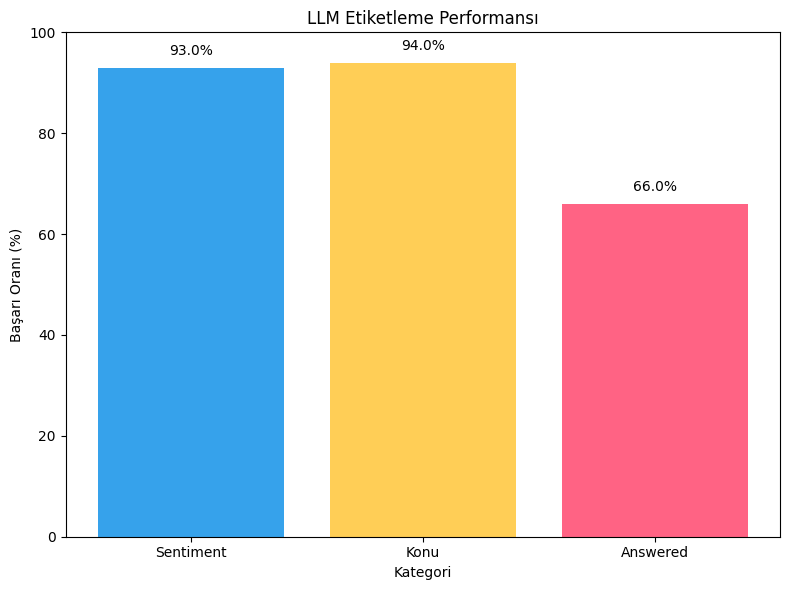

Sentiment Başarı Oranı: 93.0%
Konu Başarı Oranı: 94.0%
Answered Başarı Oranı: 66.0%


In [278]:
import matplotlib.pyplot as plt

similarityScores=[similarity_ratio1,similarity_ratio2,100]

kategoriler = ["Sentiment", "Konu", "Answered"]
basari_oranlari = [similarity_ratio1, similarity_ratio3, similarity_ratio2]

plt.figure(figsize=(8, 6))
bars = plt.bar(kategoriler, basari_oranlari, color=["#36A2EB", "#FFCE56", "#FF6384"])
plt.xlabel("Kategori")
plt.ylabel("Başarı Oranı (%)")
plt.title("LLM Etiketleme Performansı")
plt.ylim(0, 100)

# Çubukların üzerine yüzde değerlerini ekle
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{yval:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.savefig("llm_basari_oranlari.png")
plt.show()

# Başarı oranlarını yazdır
print(f"Sentiment Başarı Oranı: {similarity_ratio1:.1f}%")
print(f"Konu Başarı Oranı: {similarity_ratio3:.1f}%")
print(f"Answered Başarı Oranı: {similarity_ratio2:.1f}%")

In [286]:
from ast import literal_eval
import csv

# CSV dosyalarını oku
try:
    true_df = pd.read_csv("manuel_labels.csv", quoting=csv.QUOTE_ALL, on_bad_lines="warn")
except FileNotFoundError:
    print("Hata: manuel_labels.csv dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    exit()
except pd.errors.ParserError as e:
    print(f"Hata: CSV ayrıştırma hatası: {e}")
    print("Lütfen manuel_labels_duzeltilmis.csv dosyasını kontrol edin (virgülle ayrılmış, tırnaklarla çevrili metinler).")
    exit()

try:
    llm_predictions_df = pd.read_csv("gpt-5-nano-out1.csv", quoting=csv.QUOTE_ALL, on_bad_lines="warn")
except FileNotFoundError:
    print("Hata: gpt-5-nano-out1.csv dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    exit()
except pd.errors.ParserError as e:
    print(f"Hata: CSV ayrıştırma hatası: {e}")
    print("Lütfen llm_predictions.csv dosyasını kontrol edin (virgülle ayrılmış, tırnaklarla çevrili metinler).")
    exit()

true_df["birlesik_mesaj"]=df_sonuc["merged_talk"].head(100)
llm_predictions_df["birlesik_mesaj"]=df_sonuc["merged_talk"].head(100)
true_df["konusma"] = [f"Konusma {i+1}" for i in range(len(true_df))]
llm_predictions_df["konusma"]=[f"Konusma {i+1}" for i in range(len(llm_predictions_df))]

# Sütun isimlerini kontrol et
print("Doğru veri CSV sütunları:", true_df.columns.tolist())
print("LLM tahmin CSV sütunları:", llm_predictions_df.columns.tolist())

# Gerekli sütunların varlığını kontrol et
required_columns = ["konusma", "birlesik_mesaj", "sentiment", "konu", "answered"]
if not all(col in true_df.columns for col in required_columns):
    print(f"Hata: Doğru veri CSV'sinde gerekli sütunlar eksik. Bulunan sütunlar: {true_df.columns.tolist()}")
    exit()
if not all(col in llm_predictions_df.columns for col in required_columns):
    print(f"Hata: LLM tahmin CSV'sinde gerekli sütunlar eksik. Bulunan sütunlar: {llm_predictions_df.columns.tolist()}")
    exit()


# JSON verisi oluştur
json_data = []
merged = true_df.merge(
    llm_predictions_df,
    on="konusma",
    suffixes=("_expected", "_predicted"),
    how="left"
)

# Sonra JSON üretimi
json_data=[]
for _, row in merged.iterrows():
    json_entry = {
        "message": row["birlesik_mesaj_expected"],  
        "expected": {
            "sentiment": row["sentiment_expected"],
            "topic": row["konu_expected"],
            "bot_answered": row["answered_expected"]
        },
        "llm_prediction": {
            "sentiment": row["sentiment_predicted"],
            "topic": row["konu_predicted"],
            "bot_answered": row["answered_predicted"]
        }
    }
    json_data.append(json_entry)
    if pd.isna(row["sentiment_predicted"]):
        print(f"Uyarı: {row['konusma']} için LLM tahmini bulunamadı.")

# JSON dosyasına kaydet
with open("llm_karsilastirma.json", "w", encoding="utf-8") as f:
    json.dump(json_data, f, ensure_ascii=False, indent=2)

Doğru veri CSV sütunları: ['conversation_id', 'sentiment', 'konu', 'answered', 'birlesik_mesaj', 'konusma']
LLM tahmin CSV sütunları: ['conversation_id', 'sentiment', 'konu', 'answered', 'birlesik_mesaj', 'konusma']
